In [ ]:
import importlib
from src.neural_network import NeuralNetwork
from src.normalizer import Normalizer
importlib.reload(src.neural_network)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Backpropagation

1. **Equation for updating the error for the k-th layer**:
   $$
   e_i^k = f'(z_i^k) \sum_j w_{i,j}^{(k+1)} e_j^{(k+1)}
   $$
   
2. **Error for the last (m-th) layer**:
   $$
   e_j^m = \left( f(z_j^m) - y_j^m \right) f'(z_j^m)
   $$
   where `m` is the last layer (output layer).

3. **Weight update for the k-th layer**:
   $$
   \Delta w_{i,j}^k = -\text{learning\_rate} \cdot f(z_i^{(k-1)}) \cdot e_j^k
   $$
   
4. **Bias update for the k-th layer**:
   $$
   \Delta b_j^k = -\text{learning\_rate} \cdot e_j^k
   $$
   
5. **Index j belongs to [M]**, where M is the input size.


In [310]:
def load_data(training_path, test_path, index_col=0):
    training=pd.read_csv(training_path, index_col=index_col)
    test=pd.read_csv(test_path, index_col=index_col)

    X_train, Y_train=training['x'].to_numpy().reshape(-1,1), training['y'].to_numpy().reshape(-1,1)
    X_test, Y_test=test['x'].to_numpy().reshape(-1,1), test['y'].to_numpy().reshape(-1,1)

    return X_train, Y_train, X_test, Y_test

In [226]:
def plot_fitted_vs_actual(X_train, Y_train, Y_pred, train_or_test):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train, Y_pred, color='r', label="Predicted values")
    plt.scatter(X_train, Y_train, color='b', label="True values")
    plt.xlabel(f'X_{train_or_test}')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Square simple dataset

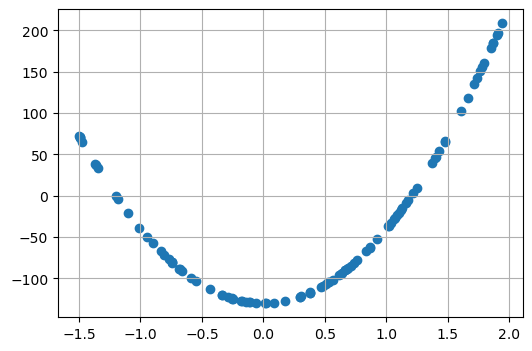

In [228]:
square_simple_training_path='data/mio/mio1/regression/square-simple-training.csv'
square_simple_test_path='data/mio/mio1/regression/square-simple-test.csv'

X_train_square_simple, Y_train_square_simple, X_test_square_simple, Y_test_square_simple=load_data(square_simple_training_path, square_simple_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_square_simple, Y_train_square_simple)

In [71]:
normalizer_square_simple = Normalizer()
X_train_square_simple_normalized, Y_train_square_simple_normalized = normalizer_square_simple.fit_transform(X_train_square_simple, Y_train_square_simple)
X_test_square_simple_normalized, Y_test_square_simple_normalized = normalizer_square_simple.transform(X_test_square_simple, Y_test_square_simple)

Epoch 0, Training Loss: 0.077523, Test Loss: 0.062165
Epoch 100, Training Loss: 0.088722, Test Loss: 0.073053
Epoch 200, Training Loss: 0.060150, Test Loss: 0.044806
Epoch 300, Training Loss: 0.066390, Test Loss: 0.053712
Epoch 400, Training Loss: 0.010590, Test Loss: 0.007453
Epoch 500, Training Loss: 0.000816, Test Loss: 0.000759
Epoch 600, Training Loss: 0.000297, Test Loss: 0.000309
Epoch 700, Training Loss: 0.000768, Test Loss: 0.000598
Epoch 800, Training Loss: 0.000241, Test Loss: 0.000235
Epoch 900, Training Loss: 0.000542, Test Loss: 0.000666
Epoch 1000, Training Loss: 0.000220, Test Loss: 0.000210
Epoch 1100, Training Loss: 0.000175, Test Loss: 0.000196
Epoch 1200, Training Loss: 0.000162, Test Loss: 0.000171
Epoch 1300, Training Loss: 0.000154, Test Loss: 0.000186
Epoch 1400, Training Loss: 0.000153, Test Loss: 0.000200
Epoch 1500, Training Loss: 0.000520, Test Loss: 0.000396
Epoch 1600, Training Loss: 0.000132, Test Loss: 0.000172
Epoch 1700, Training Loss: 0.000179, Test L

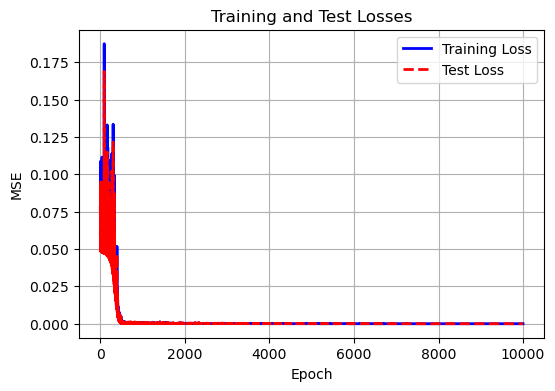

In [127]:
nn_square_simple = NeuralNetwork(layers=[1, 20, 1], learning_rate=0.2, activation='tanh',weights_initialize="Xavier" )
nn_square_simple.train(X_train_square_simple_normalized, Y_train_square_simple_normalized, 
                       X_test_square_simple_normalized, Y_test_square_simple_normalized, 
                       epochs=10000, batch_size=32, show_training=False)

In [128]:
Y_pred_denorm=normalizer_square_simple.denormalize_Y(nn_square_simple.predict(X_test_square_simple_normalized))
mse = np.mean((Y_pred_denorm - Y_test_square_simple) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.9442922961570243


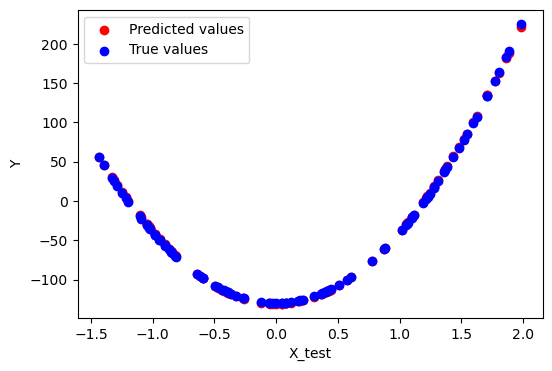

In [129]:
plot_fitted_vs_actual(X_test_square_simple, Y_test_square_simple, Y_pred_denorm, "test")

#### Steps small dataset

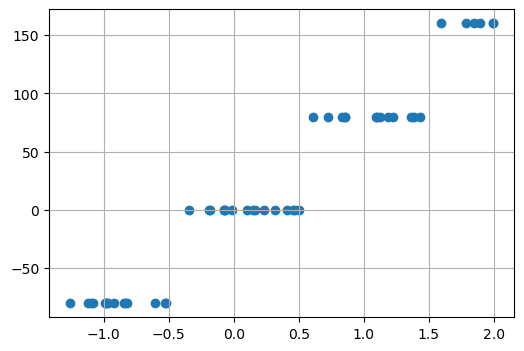

In [229]:
steps_small_training_path='data/mio/mio1/regression/steps-small-training.csv'
steps_small_test_path='data/mio/mio1/regression/steps-small-test.csv'

X_train_steps_small, Y_train_steps_small, X_test_steps_small, Y_test_steps_small=load_data(steps_small_training_path, steps_small_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_steps_small, Y_train_steps_small)

Epoch 0, Training Loss: 5720.902925, Test Loss: 6955.771782
Epoch 100, Training Loss: 513.517547, Test Loss: 684.590250
Epoch 200, Training Loss: 244.484580, Test Loss: 314.087962
Epoch 300, Training Loss: 4.263266, Test Loss: 29.102774
Epoch 400, Training Loss: 0.882668, Test Loss: 2.445781
Epoch 500, Training Loss: 0.126943, Test Loss: 1.243424
Epoch 600, Training Loss: 0.006394, Test Loss: 0.923997
Epoch 700, Training Loss: 0.026711, Test Loss: 0.845845
Epoch 800, Training Loss: 0.001903, Test Loss: 0.813010
Epoch 900, Training Loss: 0.015611, Test Loss: 0.796813
Epoch 1000, Training Loss: 0.001561, Test Loss: 0.738747
Epoch 1100, Training Loss: 0.001387, Test Loss: 0.724139
Epoch 1200, Training Loss: 0.011073, Test Loss: 0.693791
Epoch 1300, Training Loss: 0.008622, Test Loss: 0.683364
Epoch 1400, Training Loss: 0.001200, Test Loss: 0.685080
Epoch 1500, Training Loss: 0.001670, Test Loss: 0.663068
Epoch 1600, Training Loss: 0.001310, Test Loss: 0.651880
Epoch 1700, Training Loss: 0

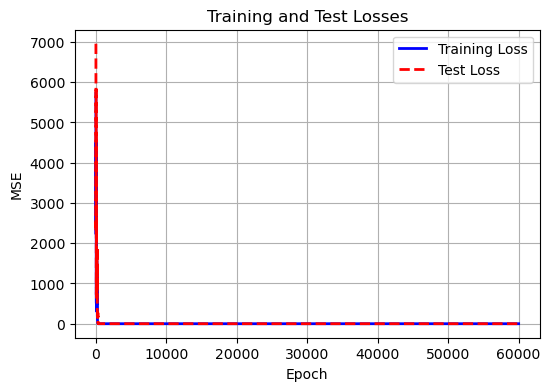

In [299]:
nn_steps_small = NeuralNetwork(layers=[1, 20, 20, 20, 1], learning_rate=0.01, activation='tanh',weights_initialize='Xavier')
nn_steps_small.train(X_train_steps_small, Y_train_steps_small, X_test_steps_small, Y_test_steps_small, 
                     batch_size=32, epochs=60000, show_training=False)

In [300]:
Y_pred = nn_steps_small.predict(X_test_steps_small)
mse_test = np.mean((Y_test_steps_small-Y_pred)**2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 0.31992185739710693


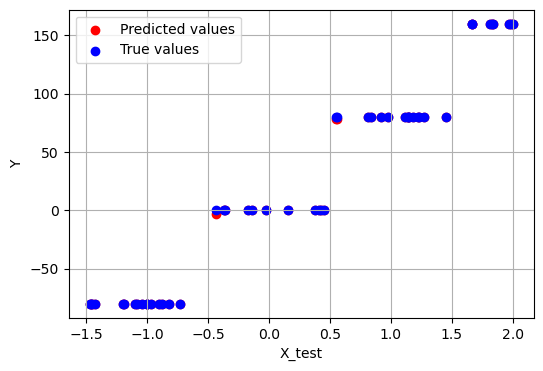

In [301]:
plot_fitted_vs_actual(X_test_steps_small, Y_test_steps_small, Y_pred, "test")

#### Multimodal large dataset

(10000, 1)


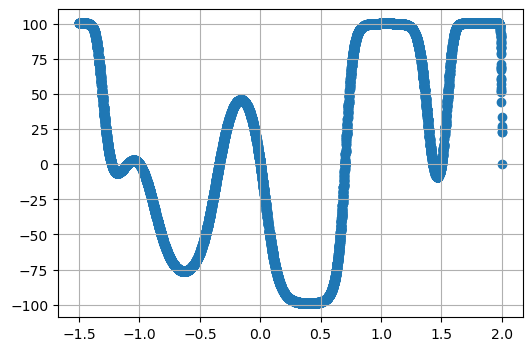

In [316]:
multimodal_large_training_path='data/mio/mio1/regression/multimodal-large-training.csv'
multimodal_large_test_path='data/mio/mio1/regression/multimodal-large-test.csv'

X_train_multimodal_large, Y_train_multimodal_large, X_test_multimodal_large, Y_test_multimodal_large=load_data(multimodal_large_training_path, multimodal_large_test_path, index_col=None)

print(X_train_multimodal_large.shape)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_multimodal_large, Y_train_multimodal_large)

In [404]:
normalizer_multimodal_large = Normalizer()
X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized = normalizer_multimodal_large.fit_transform(X_train_multimodal_large, Y_train_multimodal_large)
X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized = normalizer_multimodal_large.transform(X_test_multimodal_large, Y_test_multimodal_large)

Epoch 0, Training Loss: 0.069381, Test Loss: 0.070056
Epoch 100, Training Loss: 0.010271, Test Loss: 0.010879
Epoch 200, Training Loss: 0.005080, Test Loss: 0.005147
Epoch 300, Training Loss: 0.004324, Test Loss: 0.004492
Epoch 400, Training Loss: 0.003631, Test Loss: 0.003718


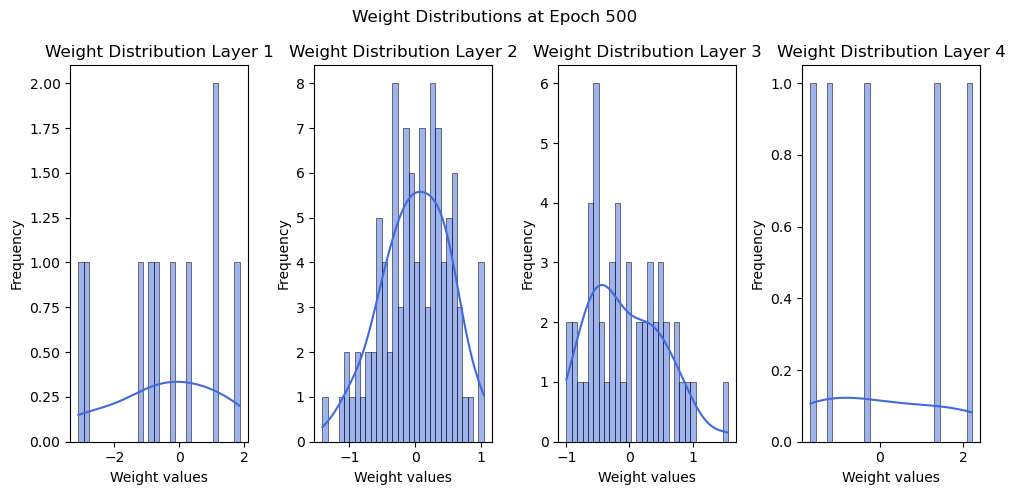

Epoch 500, Training Loss: 0.002717, Test Loss: 0.002753
Epoch 600, Training Loss: 0.002356, Test Loss: 0.002407
Epoch 700, Training Loss: 0.002057, Test Loss: 0.002074
Epoch 800, Training Loss: 0.001721, Test Loss: 0.001740
Epoch 900, Training Loss: 0.001436, Test Loss: 0.001413


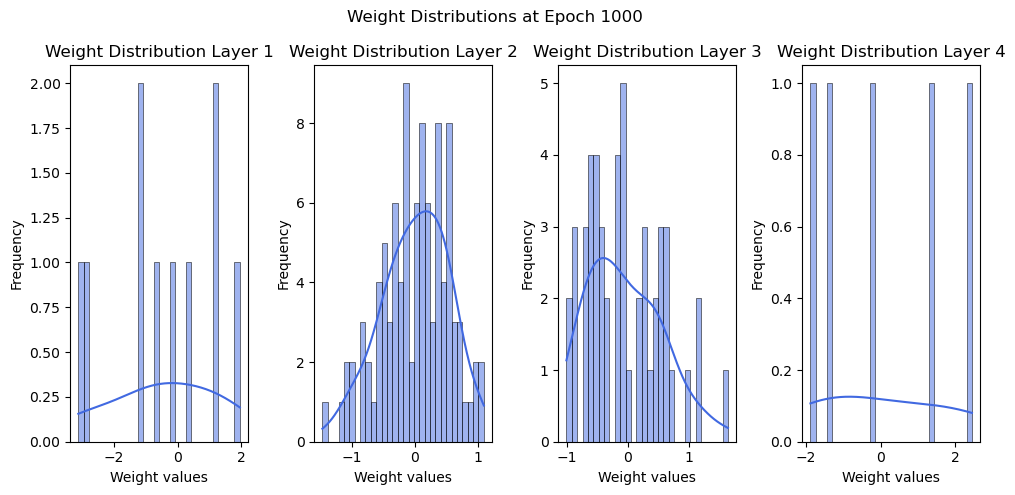

Epoch 1000, Training Loss: 0.001434, Test Loss: 0.001364
Epoch 1100, Training Loss: 0.002337, Test Loss: 0.002246
Epoch 1200, Training Loss: 0.001160, Test Loss: 0.001050
Epoch 1300, Training Loss: 0.001125, Test Loss: 0.001015
Epoch 1400, Training Loss: 0.001061, Test Loss: 0.000956


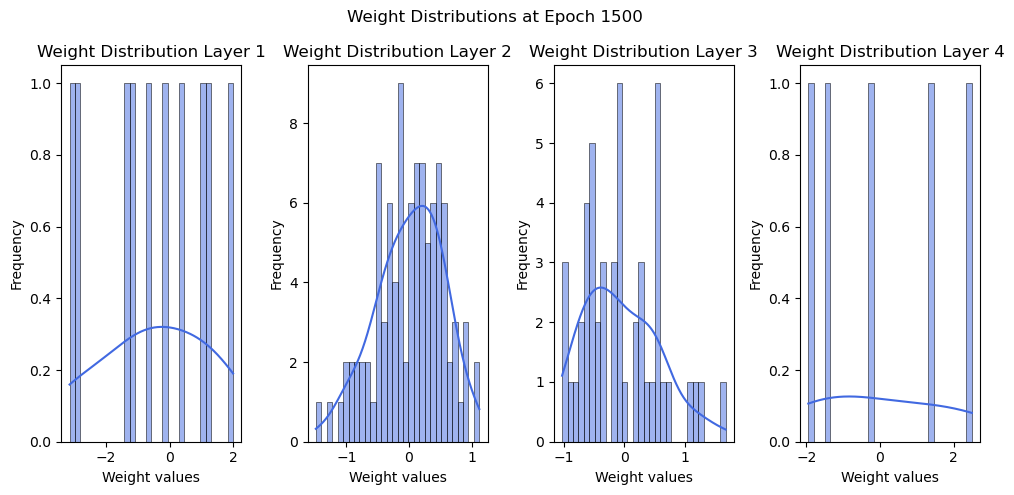

Epoch 1500, Training Loss: 0.001134, Test Loss: 0.001020
Epoch 1600, Training Loss: 0.001951, Test Loss: 0.001816
Epoch 1700, Training Loss: 0.000959, Test Loss: 0.000819
Epoch 1800, Training Loss: 0.000977, Test Loss: 0.000849
Epoch 1900, Training Loss: 0.001371, Test Loss: 0.001249


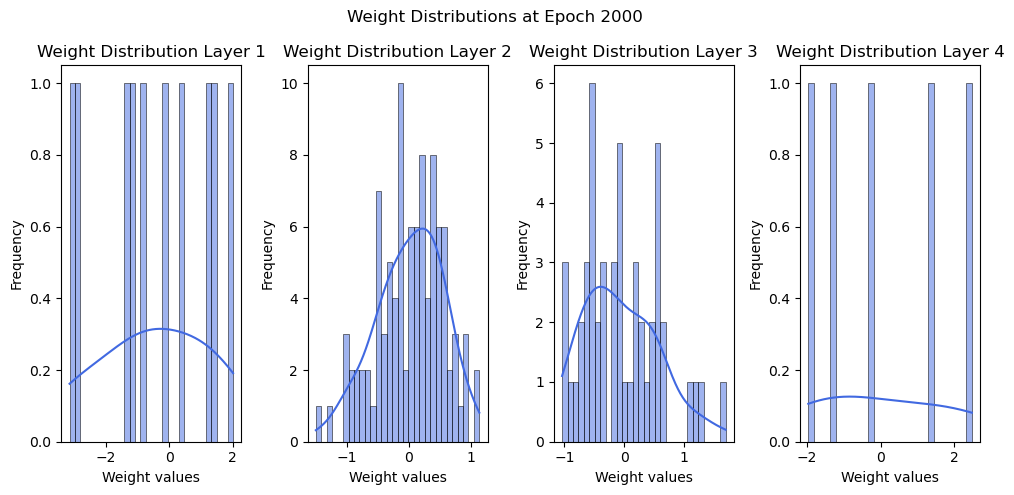

Total training time: 867.53 seconds


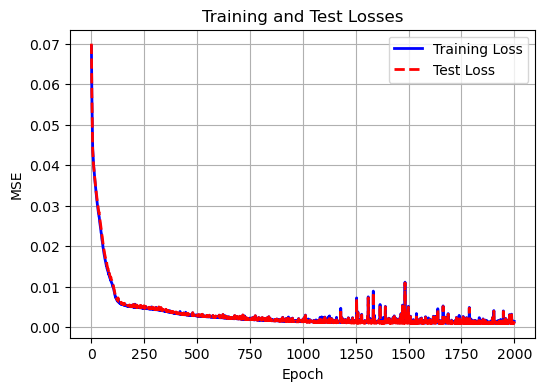

In [415]:
nn_multimodal_large = NeuralNetwork(layers=[1, 10, 10, 5, 1], learning_rate=0.01, activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=2000, show_training=True, weights_visualization_interval=500)

The network is learning, but we want to achieve MSE < 40, so we continue training the model for another 1000 epochs.

Epoch 0, Training Loss: 0.001058, Test Loss: 0.000928
Epoch 100, Training Loss: 0.001291, Test Loss: 0.001143
Epoch 200, Training Loss: 0.001017, Test Loss: 0.000881
Epoch 300, Training Loss: 0.001264, Test Loss: 0.001137
Epoch 400, Training Loss: 0.001108, Test Loss: 0.000975
Epoch 500, Training Loss: 0.001061, Test Loss: 0.000923
Epoch 600, Training Loss: 0.001140, Test Loss: 0.001000
Epoch 700, Training Loss: 0.001287, Test Loss: 0.001151
Epoch 800, Training Loss: 0.000920, Test Loss: 0.000778
Epoch 900, Training Loss: 0.001095, Test Loss: 0.000943
Total training time: 378.89 seconds


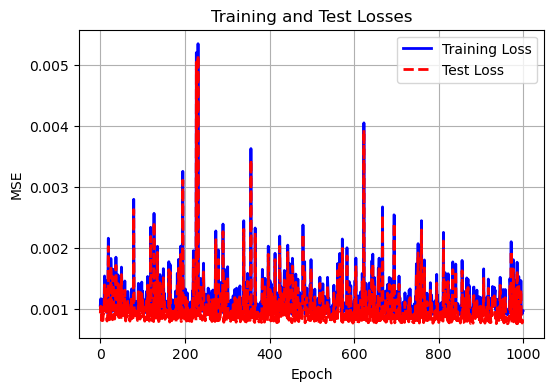

In [419]:
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=1000, show_training=False)

In [422]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 33.12549349251915


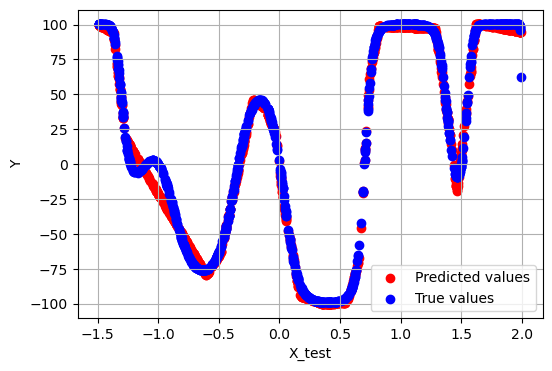

In [423]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

#### Time execution full-batch and mini-batch comparison
full-batch and mini-batch for training with 10 epochs

FULL-BATCH GRADIENT DESCENT
Epoch 0, Training Loss: 1.845605, Test Loss: 1.850700
Total training time: 59.64 seconds


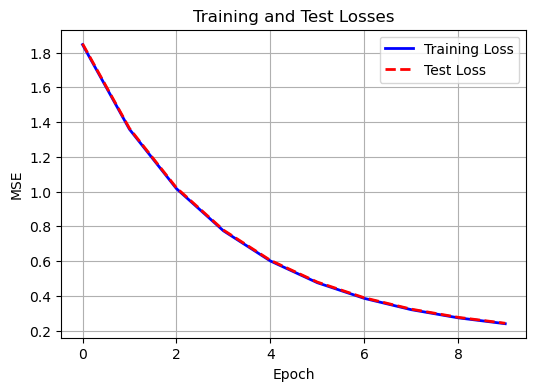


MINI-BATCH GRADIENT DESCENT (batch=32)
Epoch 0, Training Loss: 0.083773, Test Loss: 0.082744
Total training time: 6.05 seconds


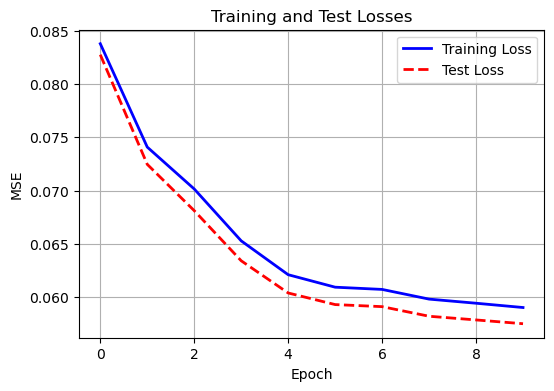

In [466]:
print("FULL-BATCH GRADIENT DESCENT")
nn_fullbatch = NeuralNetwork(layers=[1, 20, 20, 1], learning_rate=0.01, activation='relu', weights_initialize='He')
nn_fullbatch.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                   X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                   epochs=10, batch_size=None, show_training=False)  # batch_size=None → FULL-BATCH

print("\nMINI-BATCH GRADIENT DESCENT (batch=32)")
nn_minibatch = NeuralNetwork(layers=[1, 20, 20, 1], learning_rate=0.01, activation='relu', weights_initialize='He')
nn_minibatch.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                   X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,  
                   epochs=10, batch_size=32, show_training=False)  # batch_size=32 → MINI-BATCH